In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=557d794a3c6babfdd196f3172c35444b575588eff87356b3fadc92c3aaad190f
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.model_selection import train_test_split
from ta.momentum import RSIIndicator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler


# Milestone 2: Data Exploration & Initial Preprocessing

## Github
https://github.com/PranavKambhampati/CSE151GroupProject


# Data Exploration

In [3]:
# Download latest version
pathNvidia = kagglehub.dataset_download("programmerrdai/nvidia-stock-historical-data")

csv_file_path = f"{pathNvidia}/NVDA (1).csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_file_path)

#print data
df

100%|██████████| 131k/131k [00:00<00:00, 20.7MB/s]

Extracting files...


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.04,0.05,0.04,0.04,0.04,2714688000
1,1999-01-25,0.04,0.05,0.04,0.05,0.04,510480000
2,1999-01-26,0.05,0.05,0.04,0.04,0.04,343200000
3,1999-01-27,0.04,0.04,0.04,0.04,0.04,244368000
4,1999-01-28,0.04,0.04,0.04,0.04,0.04,227520000
...,...,...,...,...,...,...,...
6388,2024-06-12,123.06,126.88,122.57,125.20,125.20,299595000
6389,2024-06-13,129.39,129.80,127.16,129.61,129.61,260704500
6390,2024-06-14,129.96,132.84,128.32,131.88,131.88,309320400
6391,2024-06-17,132.99,133.73,129.58,130.98,130.98,288504400


In [4]:
# First few rows
print(df.head(), "\n")

# Information on columns, data types, and non-null counts
print(df.info(), "\n")

# Display summary statistics
print(df.describe())

         Date  Open  High  Low  Close  Adj Close      Volume
0  1999-01-22  0.04  0.05 0.04   0.04       0.04  2714688000
1  1999-01-25  0.04  0.05 0.04   0.05       0.04   510480000
2  1999-01-26  0.05  0.05 0.04   0.04       0.04   343200000
3  1999-01-27  0.04  0.04 0.04   0.04       0.04   244368000
4  1999-01-28  0.04  0.04 0.04   0.04       0.04   227520000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6393 non-null   object 
 1   Open       6393 non-null   float64
 2   High       6393 non-null   float64
 3   Low        6393 non-null   float64
 4   Close      6393 non-null   float64
 5   Adj Close  6393 non-null   float64
 6   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 349.7+ KB
None 

         Open    High     Low   Close  Adj Close        Volume
count 6393.00 6393.00 6393.00 63

### Data Preprocessing Steps:



In [5]:
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)

In [6]:
print(df)

             Open   High    Low  Close  Adj Close      Volume
Date                                                         
1999-01-22   0.04   0.05   0.04   0.04       0.04  2714688000
1999-01-25   0.04   0.05   0.04   0.05       0.04   510480000
1999-01-26   0.05   0.05   0.04   0.04       0.04   343200000
1999-01-27   0.04   0.04   0.04   0.04       0.04   244368000
1999-01-28   0.04   0.04   0.04   0.04       0.04   227520000
...           ...    ...    ...    ...        ...         ...
2024-06-12 123.06 126.88 122.57 125.20     125.20   299595000
2024-06-13 129.39 129.80 127.16 129.61     129.61   260704500
2024-06-14 129.96 132.84 128.32 131.88     131.88   309320400
2024-06-17 132.99 133.73 129.58 130.98     130.98   288504400
2024-06-18 131.14 136.33 130.69 135.58     135.58   292395300

[6393 rows x 6 columns]


In [7]:
# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

na_values = df.isna().sum()
print("\nNA values in each column:\n", na_values)

Missing values in each column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NA values in each column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
df['Volume'].describe()

,Volume
count,6393.00
mean,607335174.96
std,432810340.78
min,19680000.00
25%,347701000.00
50%,509304000.00
75%,737192000.00
max,9230856000.00


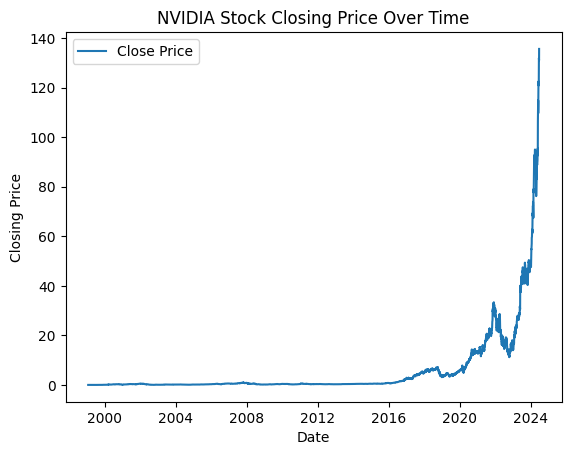

In [9]:
# plt.scatter(df['Date'], df['Close'])

plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.legend()
plt.show()

# Milestone 3 - Linear Regression Model


In [10]:
df['MovingAvg10'] = df['Close'].rolling(window=10).mean()
df['MovingAvg40'] = df['Close'].rolling(window=50).mean()

df['MoneyFlowMultiplier'] = ((2 * df['Close']) - df['High'] - df['Low']) / (df['High'] - df['Low'])
df['MoneyFlowVolume'] = df['MoneyFlowMultiplier'] * df['Volume']
df['AccumulationDistribution'] = df['MoneyFlowVolume'].cumsum()

rsi_period = 14 # a pretty standard period for RSI
rsi = RSIIndicator(close=df['Close'], window=rsi_period)
df['RSI'] = rsi.rsi()

df = df.dropna()

X = df[['Close', 'MovingAvg10', 'MovingAvg40', 'AccumulationDistribution', 'RSI']]
y = df['Close'].shift(-1).dropna()
X = X[:-1]

split_index = int(0.9 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print(X_train.head())
print(X_train.tail())
print(y_train.head())
print(y_train.tail())
print(X_test.head())
print(X_test.tail())
print(y_test.head())
print(y_test.tail())

            Close  MovingAvg10  MovingAvg40  AccumulationDistribution   RSI
Date                                                                       
1999-04-05   0.04         0.04         0.04            -2241004617.22 46.68
1999-04-06   0.04         0.04         0.04            -2264196972.17 44.39
1999-04-07   0.04         0.04         0.04            -2187653762.29 52.52
1999-04-08   0.04         0.04         0.04            -2202149455.00 54.18
1999-04-09   0.04         0.04         0.04            -2231353731.49 52.21
            Close  MovingAvg10  MovingAvg40  AccumulationDistribution   RSI
Date                                                                       
2021-11-30  32.68        31.81        25.48            46988813189.77 65.40
2021-12-01  31.43        31.93        25.68            46532355312.44 58.75
2021-12-02  32.13        32.22        25.88            46776121965.96 61.12
2021-12-03  30.69        32.12        26.05            46538405874.15 54.16
2021-12-06  

Train MSE: 0.019935673148219275, Test MSE: 2.058281045790386
Train RMSE: 0.14119374330408296, Test RMSE: 1.4346710583929636
Train MAE: 0.04563694183524055, Test MAE: 0.9129042538466243
Train R²: 0.998957885014567, Test R²: 0.9969760990207195


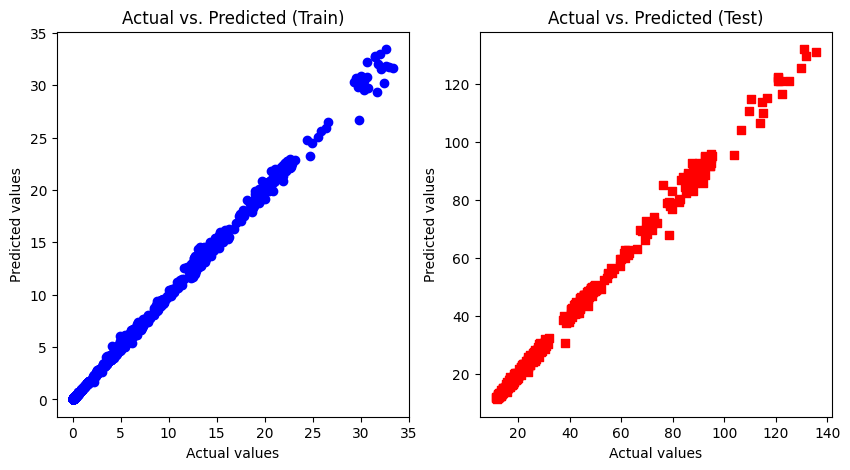

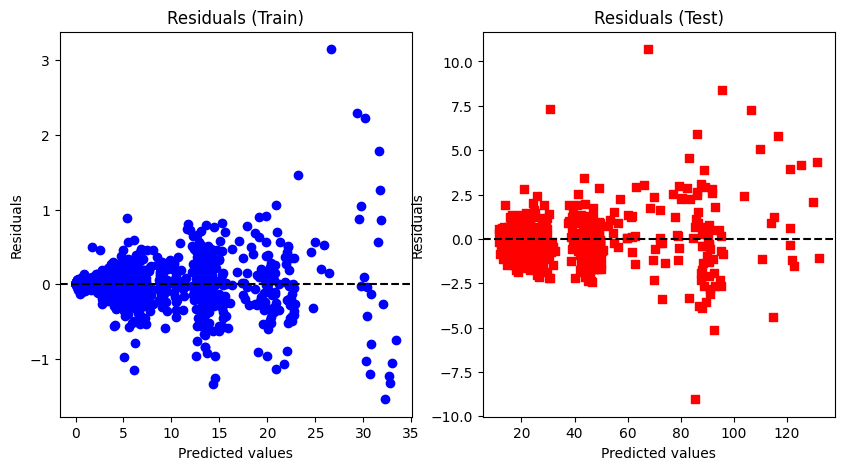

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

# Plotting predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.title('Actual vs. Predicted (Train)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='red', marker='s', label='Test data')
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Residual plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train - y_train_pred, c='blue', marker='o', label='Training data')
plt.title('Residuals (Train)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.axhline(0, color='black', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test - y_test_pred, c='red', marker='s', label='Test data')
plt.title('Residuals (Test)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.axhline(0, color='black', linestyle='--')
plt.show()

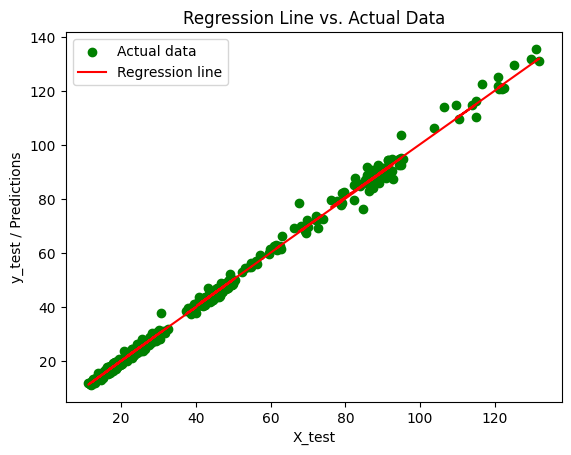

In [12]:
plt.scatter(X_test['Close'], y_test, color="green", label="Actual data")

plt.plot(X_test['Close'], y_test_pred, color="red", label="Regression line")

plt.xlabel("X_test")
plt.ylabel("y_test / Predictions")
plt.title("Regression Line vs. Actual Data")
plt.legend()

plt.show()

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814., 19905.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07')])

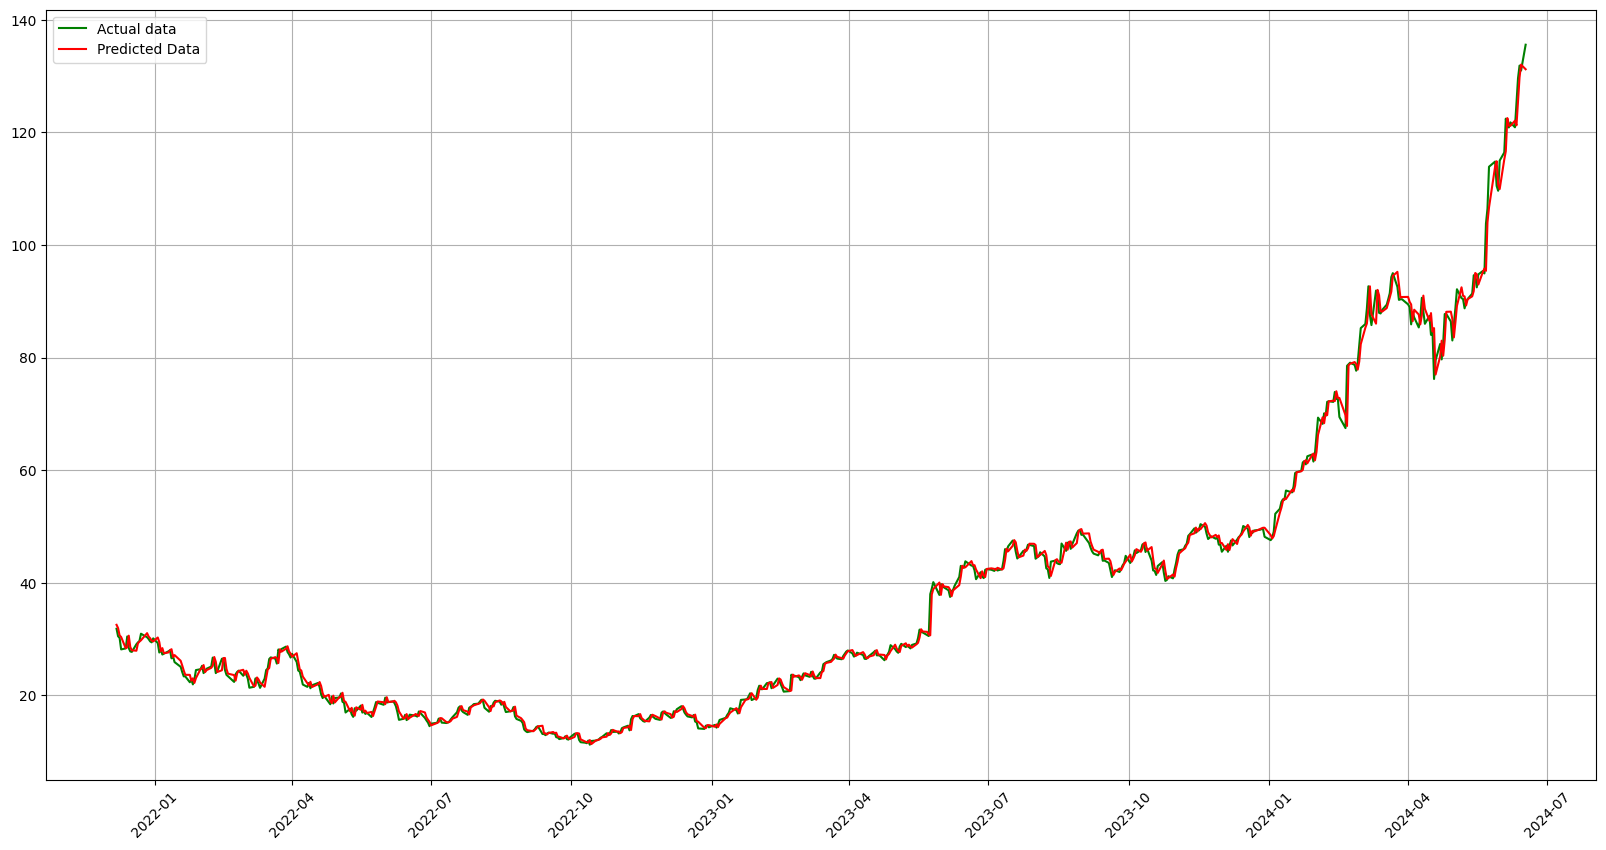

In [13]:
# print(y_test_pred)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Predicted'])
# print(y_test_pred_df)
# print(y_test.reset_index())

y_pred_test_combined = pd.concat([y_test.reset_index(), y_test_pred_df], axis=1)
# print(y_pred_test_combined)

# plot the linear regression
plt.figure(figsize=(20, 10))
plt.plot(y_pred_test_combined['Date'], y_pred_test_combined['Close'], color="green", label="Actual data")
plt.plot(y_pred_test_combined['Date'], y_pred_test_combined['Predicted'], color="red", label="Predicted Data")
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Milestone 4 - LSTM Model

In [14]:
df.reset_index().head()

,Date,Open,High,Low,Close,Adj Close,Volume,MovingAvg10,MovingAvg40,MoneyFlowMultiplier,MoneyFlowVolume,AccumulationDistribution,RSI
0,1999-04-05,0.04,0.04,0.04,0.04,0.04,98640000,0.04,0.04,-0.75,-74015516.08,-2241004617.22,46.68
1,1999-04-06,0.04,0.04,0.04,0.04,0.04,69696000,0.04,0.04,-0.33,-23192354.95,-2264196972.17,44.39
2,1999-04-07,0.04,0.04,0.04,0.04,0.04,89280000,0.04,0.04,0.86,76543209.88,-2187653762.29,52.52
3,1999-04-08,0.04,0.05,0.04,0.04,0.04,130128000,0.04,0.04,-0.11,-14495692.70,-2202149455.00,54.18
4,1999-04-09,0.04,0.04,0.04,0.04,0.04,48624000,0.04,0.04,-0.60,-29204276.50,-2231353731.49,52.21


In [15]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare data for LSTM
sequence_length = 50
X_lstm, y_lstm = [], []
for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-test split
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Define LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict and inverse scale
y_pred = lstm_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - loss: 3.6634e-05
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.1780e-06
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 9.1947e-07
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 9.4588e-07
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 7.5098e-07
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 7.6095e-07
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 8.9723e-07
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 9.7168e-07
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 7.8145e-07
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 6.7668e-07
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 7.1016e-07
Epoch 12/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 6.9045e-07
Epoch 13/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 6.0743e-07
Epoch 14/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/st

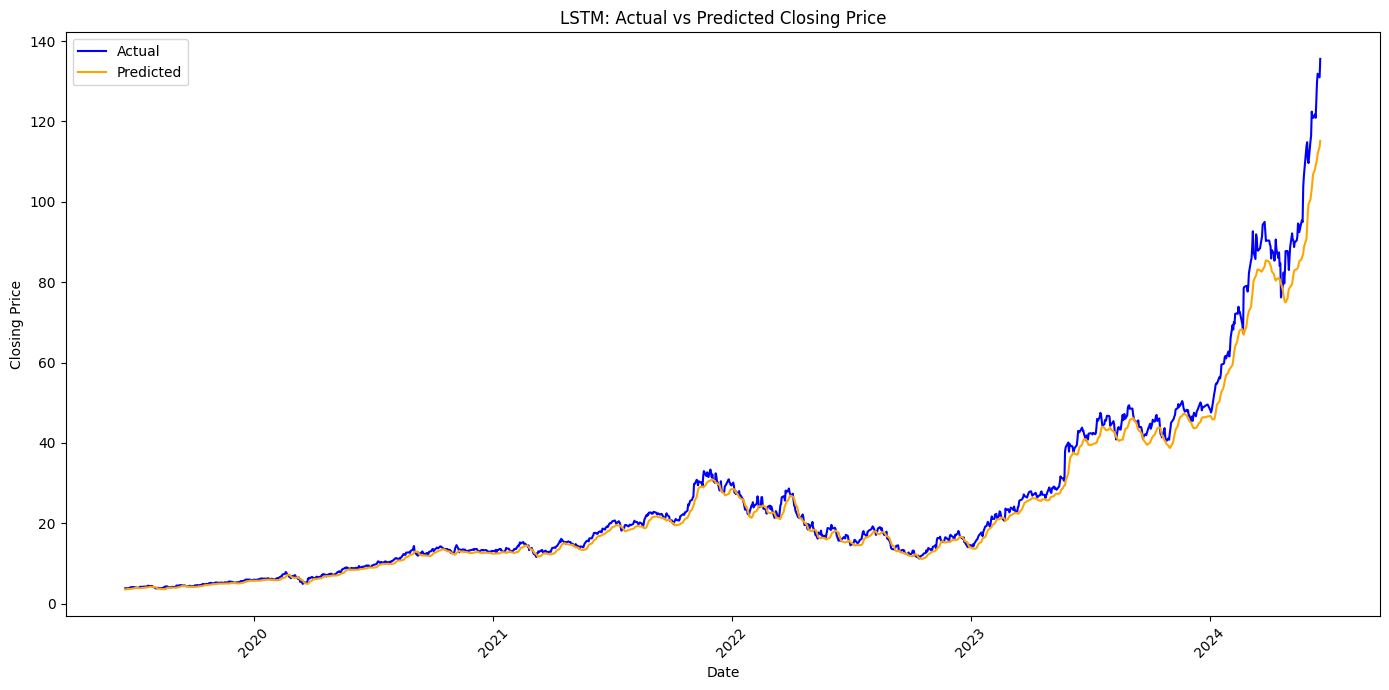

In [16]:
# Plot
plt.figure(figsize=(14, 7))
df_reset = df.reset_index()
plt.plot(df_reset['Date'].iloc[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(df_reset['Date'].iloc[-len(y_test):], y_pred, label="Predicted", color="orange")
plt.title("LSTM: Actual vs Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error


actual_classes = (y_test[1:] > y_test[:-1]).astype(int).flatten()
predicted_classes = (y_pred[1:] > y_pred[:-1]).astype(int).flatten()

print("Classification Report:")
print(classification_report(actual_classes, predicted_classes))

print("MSE Test")
print(mean_squared_error(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41       566
           1       0.54      0.61      0.57       692

    accuracy                           0.50      1258
   macro avg       0.49      0.49      0.49      1258
weighted avg       0.50      0.50      0.50      1258

MSE Test
10.640387700869184
